## Program Flow

1. モジュールインポート

# モジュールインポート

In [17]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# scikit learnのテストデータの読み込み
from sklearn.model_selection import train_test_split

# scikit learnの精度測定ツールの読み込み
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

#トレーニングデータと正解ラベルに分割
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 変数定義

In [19]:
# 0.97 は5000万ぐらい儲かった
# pram_traing_rate=0.97   #トレーニングデータとテストデータの比率

pram_traing_rate=0.5 #トレーニングデータとテストデータの比率

# 前処理済みファイルのロード

In [20]:
# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_csv('data/fx_preprocessing.csv', index_col=None)
df.columns

Index(['Date', 'Close', 'Open', 'day+1', 'day+2', 'day+3', 'day+4', 'day+5',
       'day+6', 'day+7', 'day+8', 'day+9', 'day+10', 'day+11', 'day+12',
       'day+13', 'day+14', 'day+15', 'day+16', 'day+17', 'day+18', 'day+19',
       'day+20', 'day+21', 'day+22', 'day+23', 'day+24', 'day+25', 'day+26',
       'day+27', 'day+28', 'day+29', 'day+30', 'std-30', 'std-60', 'std-90',
       'label_up', 'label_none', 'label_down', 'rolling_up5', 'rolling_down5',
       'label_none5', 'rolling_up10', 'rolling_down10', 'label_none10',
       'restult'],
      dtype='object')

In [21]:

y_loc_s=df.columns.get_loc('label_up')
y_loc_e=df.columns.get_loc('label_down')
df.tail(3)


# 前後のデータのカット
df3=df.loc[30:(len(df)-30)]
df2_num=df3.as_matrix()   #numpyへ変換

fx_len=len(df3)

In [22]:
# 不均衡データ用
def label_ratio(df_tmp):

    # label数を揃える
    min_labels=[df_tmp[df_tmp['label_up']==1].shape[0],
         df_tmp[df_tmp['label_none']==1].shape[0],
         df_tmp[df_tmp['label_down']==1].shape[0]]

    min_sample=min(min_labels)


    # サンプル後再度結合
    df_tmp=pd.concat([
        df_tmp[df3['label_up']==1].sample(n=min_sample)
        ,df_tmp[df_tmp['label_down']==1].sample(n=min_sample)
        ,df_tmp[df_tmp['label_none']==1].sample(n=min_sample)
        ])

    print(df_tmp[df_tmp['label_up']==1].shape)
    print(df_tmp[df_tmp['label_none']==1].shape)
    print(df_tmp[df_tmp['label_down']==1].shape)
    
    return df_tmp

## データの分割


In [23]:
train, test = train_test_split(df3, train_size=pram_traing_rate,shuffle=False)

print("訓練データ  :{}〜{}".format(train.head(1)['Date'].values[0],train.tail(1)['Date'].values[0]))
print("テストデータ:{}〜{}".format(test.head(1)['Date'].values[0],test.tail(1)['Date'].values[0]))

訓練データ  :2000-10-09〜2010-02-15
テストデータ:2010-02-16〜2020-03-23


In [24]:
df.columns

Index(['Date', 'Close', 'Open', 'day+1', 'day+2', 'day+3', 'day+4', 'day+5',
       'day+6', 'day+7', 'day+8', 'day+9', 'day+10', 'day+11', 'day+12',
       'day+13', 'day+14', 'day+15', 'day+16', 'day+17', 'day+18', 'day+19',
       'day+20', 'day+21', 'day+22', 'day+23', 'day+24', 'day+25', 'day+26',
       'day+27', 'day+28', 'day+29', 'day+30', 'std-30', 'std-60', 'std-90',
       'label_up', 'label_none', 'label_down', 'rolling_up5', 'rolling_down5',
       'label_none5', 'rolling_up10', 'rolling_down10', 'label_none10',
       'restult'],
      dtype='object')

In [25]:
# labelの数を整える
train=label_ratio(train)
#トレーニングデータと正解ラベルに分割
#trainX,testX=train.iloc[:,3:y_loc_s],test.iloc[:,3:y_loc_s]
#trainY,testY=train.iloc[:,y_loc_s:y_loc_e+1],test.iloc[:,y_loc_s:y_loc_e+1]

# データセットは、３カラムめから正解データのところまで
trainX,testX=train.iloc[:,3:y_loc_s],test.iloc[:,3:y_loc_s]

# 正解データは、
#trainY,testY=train.iloc[:,df.shape[1]-1],test.iloc[:,df.shape[1]-1]
trainY,testY=train['restult'],test['restult']


#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認
print("トレーニングデータ",trainX.shape)
print("トレーニングデータ",trainY.shape)
print("　 　 テストデータ",testX.shape)
print("　 　 テストデータ",testY.shape)

(611, 46)
(611, 46)
(611, 46)
トレーニングデータ (1833, 33)
トレーニングデータ (1833,)
　 　 テストデータ (2438, 33)
　 　 テストデータ (2438,)


# sckit-learnの準備


In [26]:
# ワンホットからカテゴリ変数へ
#testY2 =np.argmax(testY,axis=1)
#trainY2=np.argmax(trainY,axis=1)

testY2 =testY
trainY2=trainY


In [27]:
type(trainY)

numpy.ndarray

# 回帰モデル

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# モデルの構築と評価
names = [
        "SVC", 
        "ridge", 
        "lasso",
        ]



classifiers = [
#   LinearRegression(),
# LinearSVC(),
   Ridge(random_state=0),
  Lasso(random_state=0),
]
classifiers

[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=0, solver='auto', tol=0.001),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=0,
       selection='cyclic', tol=0.0001, warm_start=False)]

In [29]:
trainY2

array([1.0201795 , 1.00890244, 1.00851466, ..., 1.00299643, 1.0011585 ,
       1.00199759])

In [30]:
columns=['name','accuracy','mae','r2']
df_acc=pd.DataFrame(data=None,columns=columns)

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score


for classifier, name in zip(classifiers, names):
    
    #　該当分類器にて、学習
    classifier.fit(trainX ,trainY2)
    
 
    #　分類器の正答率を求める
    pre=classifier.predict(testX)

    ac_score=classifier.score(testX,testY2)
    mae=mean_absolute_error(testY2, pre)
    r2=r2_score(testY2, pre)
    
    print('分類器:{:} , 精度:{:.2%}'.format(name,ac_score))

    # 結果をデータフレームに入れる
    s=pd.Series(data=[name,ac_score,mae,r2],index=columns)
    df_acc=df_acc.append(s,ignore_index=True)

分類器:SVC , 精度:-7.87%
分類器:ridge , 精度:-2.33%


# Light GBM

In [31]:
import lightgbm as lgb
train_data_set = lgb.Dataset(trainX ,trainY2)
test_data_set = lgb.Dataset(testX , testY2, reference=train_data_set)
 
params = {                                                                                               
    'boosting_type': 'gbdt',                                                                             
    'objective': 'regression_l2',                                                                           
    'metric': 'l2',                                                                             
    'num_leaves': 40,                                                                                    
    'learning_rate': 0.05,                                                                               
    'feature_fraction': 0.9,                                                                             
    'bagging_fraction': 0.8,                                                                             
    'bagging_freq': 5,   
    'lambda_l2': 2,
}                                                                                                        
                                                                                                         
gbm = lgb.train(params,                                                                                  
                train_data_set,                                                                               
                num_boost_round=200,                                                                      
                valid_sets=test_data_set,                                                                     
                early_stopping_rounds=10
                )   

y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration)
#print(y_pred)

[1]	valid_0's l2: 0.000131181
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.000131208
[3]	valid_0's l2: 0.000131064
[4]	valid_0's l2: 0.000130749
[5]	valid_0's l2: 0.000131013
[6]	valid_0's l2: 0.000131076
[7]	valid_0's l2: 0.000131083
[8]	valid_0's l2: 0.000131175
[9]	valid_0's l2: 0.00013139
[10]	valid_0's l2: 0.000131589
[11]	valid_0's l2: 0.000131646
[12]	valid_0's l2: 0.000131843
[13]	valid_0's l2: 0.000131946
[14]	valid_0's l2: 0.000131937
Early stopping, best iteration is:
[4]	valid_0's l2: 0.000130749


In [32]:
name="lighGBM"
pre= gbm.predict(testX, num_iteration=gbm.best_iteration)

mae=mean_absolute_error(testY2, pre)
r2=r2_score(testY2, pre)
    
print('分類器:{:} , 精度:{:.2%}'.format(name,ac_score))

# 結果をデータフレームに入れる
s=pd.Series(data=[name,ac_score,mae,r2],index=columns)
df_acc=df_acc.append(s,ignore_index=True)

分類器:lighGBM , 精度:-2.33%


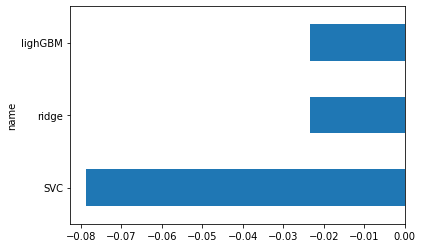

In [33]:
%matplotlib inline
# データフレームの順番を分類器の精度順に表示
df_acc=df_acc.sort_values(by=['accuracy'],ascending=True)
# データフレームのラッパAPIからmatplotのapiをコールして、グラフを作成
df_acc.plot.barh(x='name',y='accuracy',legend=False)

# confusion_matrix

# シミュレーション

In [34]:
close_index=df.columns.get_loc('Close')
open_index=df.columns.get_loc('Open')
date_index=df.columns.get_loc('Date')

MONEY=1000000
LEN=len(df2_num)

start=len(df2_num)-len(testX)
end=len(df2_num)-1
print("start:",df2_num[start,0],"〜end:",df2_num[end,0])

standard=1000000/df2_num[start,1]  
DATE=""
result_out=""
df_sim = pd.DataFrame( columns=['Date', 'Open', 'Close', 'Up', 'money','基準価格','result','predict','正誤','利益率'] )

start: 2010-02-16 〜end: 2020-03-23


In [35]:
df2_num.shape,df3.columns
#df3.shape
df3.columns[45]

'restult'

In [36]:
for i in range(start,end): 
        PRE=df2_num[i,np.array([
                               3,4,5,    #'day+1', 'day+2', 'day+3',
                               6,7,8,    #'day+4', 'day+5','day+6',
                               9,10,11,  #'day+7', 'day+8', 'day+9'
                               12,13,14, #'day+10', 'day+11', 'day+12'
                               15,16,17, #'day+13', 'day+14', 'day+15',
                               18,19,20, # 'day+16', 'day+17', 'day+18', 
                               21,22,23, #'day+19','day+20', 'day+21', 
                               24,25,26, # 'day+22', 'day+23', 'day+24',
                               27,28,29, # 'day+25', 'day+26','day+27', 
                               30,31,32, #'day+28', 'day+29', 'day+30',

                               33,34,35, #'std-30', 'std-60', 'std-90',
                           #    36,37,38,
                           #    39,40,41,
                           #    42,43,44,
                           #    45,46,47,
                           #    48,49,50,
                           #    51,52,53,
                           #    54,55,56,
                           #    57,58,59,
                            #   60,61,62,
                            #                63,64,65
                               ])]
        
        #予測のコマンド
        #PRE2 = classifier.predict_proba(np.resize(PRE,(1,trainX.shape[1])))
        
        
        pre2= gbm.predict(np.resize(PRE,(1,trainX.shape[1])))
        #print("ここ",pre2)
        #PRE2=PRE2[0]
        
        profit_rate=0
        DATE2=df2_num[i,date_index]
        if DATE != DATE2[:7]:       #月初の定点観測
            DATE=DATE2[:7]
            print()
            result_out=result_out+"\n"
            if DATE2[5:7]=="01":
                print("--------------------------------------------------------------------")
                result_out=result_out+"--------------------------------------------------------------------"+"\n"
            STRING=df2_num[i,0]+":資金"+"{:,}".format(int(MONEY))+"(基準"+"{:,}".format(int(standard*df2_num[i,1])).strip()+")"
            print(STRING.strip(),end="")
            result_out=result_out+STRING.strip()+"\n"



        PREDICT    ="None"
        #  売り予測の場合
        ##if PRE2[2]>0.5:
        #print((1-pre2),end=" ")
        if (1-pre2)<0:
            PREDICT="sell"
            #print("売:",end=" ")
            profit_rate=df2_num[i,open_index]/df2_num[i, close_index]
            MONEY=(profit_rate)*MONEY
            print("売",end="")

        #  買い予測の場合
        #if PRE2[0]>0.5:
        if (1-pre2)>0:
            print("買",end="")

            PREDICT="buy"
            profit_rate=df2_num[i,close_index]/df2_num[i,open_index]
            MONEY=(profit_rate)*MONEY
      
        if (1-df2_num[i,45])>0  :
            Y_result="buy"
        elif (1-df2_num[i,45])<0:
            Y_result="sell"
        else:
            Y_result="None"
            
        seigo="×"    
        if Y_result==PREDICT:
            seigo
        
        
        if profit_rate!=0:
            profit_rate=100*(profit_rate-1)
        
        s1 = pd.Series([df2_num[i,0],                 #日付
                        round(df2_num[i,open_index], 2),        #OPEN
                        round(df2_num[i,close_index],2),        #Close
                        round((df2_num[i,close_index]/df2_num[i,open_index]-1)*100,2),  #アップ率
                        round(MONEY),
                        int(standard*df2_num[i,1]),                 #基準価格
                        Y_result,
                        PREDICT,seigo,
                        round(profit_rate,2)],                     #予測
               index=df_sim.columns)
        df_sim=df_sim.append(s1,ignore_index=True)
        


2010-02-16:資金1,000,000(基準1,000,000)買買買買買買買売売
2010-03-01:資金1,028,393(基準992,004)売買売売買売売売売買売売買買買買売売買売買売買
2010-04-01:資金1,002,349(基準1,103,076)買買買買売買買買買買買買買買売売売買買買買売
2010-05-03:資金1,053,412(基準1,082,845)買買買売売買買買買買買売買買売売売売買売買
2010-06-01:資金1,041,365(基準1,000,951)買買買買買買買買買買買売買買売売売売買売売買
2010-07-01:資金1,118,092(基準962,018)買売買買買買買買買買売買売買売買買買売買売売
2010-08-02:資金1,201,452(基準1,006,619)売売買買売売売売買売売売買買買買売買売売売買
2010-09-01:資金1,240,012(基準984,059)買買買売買売売売売売売買売売売買買買買買買買
2010-10-01:資金1,192,126(基準1,020,171)売買売売買売買買買売売売買買買買買買買買買
2010-11-01:資金1,148,344(基準979,870)売売買買売買売買売買買買売売売売売買売売売売
2010-12-01:資金1,112,575(基準1,019,101)買買売買売売買売売売買買売買売売売買売買買売買
--------------------------------------------------------------------
2011-01-03:資金1,119,749(基準1,047,863)売買買売買買買買売買買売買売買買買買買買買
2011-02-01:資金1,141,518(基準971,008)買買買売買買買買買買買買買買売買買買売売
2011-03-01:資金1,155,408(基準994,026)買売買売売買買買売売売買売売売売売買売売買買買
2011-04-01:資金1,092,626(基準1,066,412)買買買買買買買買買買買買買買売買売売売売買
2011-05-02:資金1,105,197(基準1,045,722)売売売買売買買買買買買買買買買買買売買売買買
2011-06-01:資金1,135,672(基準1,005

In [37]:
df_sim[(
    df_sim['Date'].str.contains('01-01') |
    df_sim['Date'].str.contains('04-01') |
    df_sim['Date'].str.contains('07-01') |
    df_sim['Date'].str.contains('10-01') 
)]

,Date,Open,Close,Up,money,基準価格,result,predict,正誤,利益率
32,2010-04-01,12.81,12.98,1.33,1015665,1103076,sell,buy,×,1.33
97,2010-07-01,11.50,11.32,-1.58,1100403,962018,buy,buy,×,-1.58
163,2010-10-01,11.89,12.01,0.96,1180748,1020171,sell,sell,×,-0.95
293,2011-04-01,12.28,12.55,2.22,1116922,1066412,sell,buy,×,2.22
358,2011-07-01,11.90,12.01,0.96,1086273,1020596,sell,sell,×,-0.95
684,2012-10-01,9.36,9.32,-0.47,1224838,791943,buy,buy,×,-0.47
750,2013-01-01,10.25,10.24,-0.13,1285715,869817,buy,buy,×,-0.13
814,2013-04-01,10.19,10.15,-0.36,1322862,862366,buy,buy,×,-0.36
879,2013-07-01,10.02,10.03,0.14,1307518,852288,sell,buy,×,0.14
945,2013-10-01,9.78,9.68,-1.05,1404324,822642,buy,buy,×,-1.05


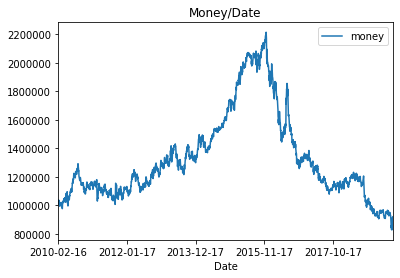

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

df_sim.plot(x='Date',y='money',title='Money/Date')

In [39]:
print("●",df_sim[df_sim['正誤']=="●"].shape)
print("X",df_sim[df_sim['正誤']=="×"].shape)

for i in range(7,19):
    YEAR=str(i+2000)
    start=YEAR+"-01-01"
    end=YEAR+"-12-31"

    tmp=df_sim.query("Date >= @start and Date <= @end ")
    
    print("{:}年の利益率{:.2f}%".format(YEAR,tmp[['利益率']].sum()[0]))

● (0, 10)
X (2437, 10)
2007年の利益率0.00%
2008年の利益率0.00%
2009年の利益率0.00%
2010年の利益率12.89%
2011年の利益率2.39%
2012年の利益率15.46%
2013年の利益率6.88%
2014年の利益率24.64%
2015年の利益率13.49%
2016年の利益率-32.92%
2017年の利益率-14.99%
2018年の利益率-12.05%


# 特徴選択

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb=SelectKBest(chi2,k=10)

skb.fit(trainX,trainY2)
trainX_new=skb.transform(trainX)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
model = SVC(kernel='linear', random_state=None)
k_range=np.arange(1,20)
scores=[]
std=[]

#clf = XGBClassifier()
classifier = SVC(kernel='linear', random_state=None)



for k in k_range:
    ss= StratifiedKFold(n_splits  =5,
                       shuffle    =True,
                      random_state=2)
    score=[]
    
    for train_index, val_index in ss.split(trainX,trainY2):
        
        X_train2,X_val =trainX[train_index],trainX[val_index]
        y_train2,y_val =trainY2[train_index],trainY2[val_index]
        
        skb=SelectKBest(chi2,k=k)
        skb.fit(X_train2,y_train2)
        
        X_new_train2=skb.transform(X_train2)
        X_new_val   =skb.transform(X_val)
        
        classifier.fit(X_new_train2,y_train2)
        score.append(clf.score(X_new_val,y_val))
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,scores)
plt.errorbar(k_range,scores,yerr=std)
plt.ylabel("accuracy")
plt.xlim(0,20)

# どの説明変数が聞いているのか